# Statistical Thinking in Python Part I.

### Acknowledgement

<a href='https://learn.datacamp.com/skill-tracks/statistics-fundamentals-with-python'>DataCamp</a>

### Table of Contents

[Graphical EDA](#graphical_eda)
- [Histogram Plot](#histogram)
- [BeeSwarm Plot](#beeswarm)
- [ECDFs](#ecdf)

In [4]:
import os
os.chdir("projects_on_GitHub/POC/Statistics")

In [10]:
import seaborn as sns

## Graphical EDA

> Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. --John Tukey


## DataSets

1. 2008_swing_state.csv
2. iris dataset

### 1. Introduction to `2008_swing_states.csv`

In [8]:
df_swing = pd.read_csv('datacamp_data/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


### 2. Introduction to iris dataset

In [25]:
from sklearn import datasets
iris = datasets.load_iris()

In [27]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [67]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [64]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [65]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [68]:
# Create dataframe from iris dataset
def rev_dummies(x):
#     target_dict = {0:'setosa', 1:'versicolor', 2:'virginica'}
    if x==0:
        return 'setosa'
    elif x==1:
        return 'versicolor'
    else:
        return 'virginica'

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.species = iris_df.species.apply(rev_dummies)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Histogram

**Disadvantages**
- The same data may be interpreted differently depending on choice of bins (___Alternative:___ Bee Swarm Plot)


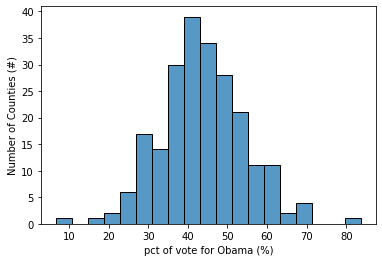

In [15]:
sns.histplot(data=df_swing, x='dem_share')

plt.xlabel('pct of vote for Obama (%)')
plt.ylabel('Number of Counties (#)');

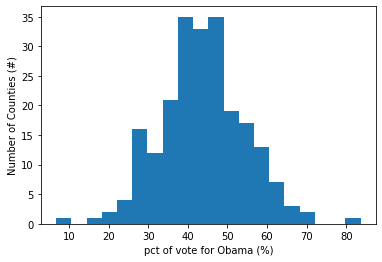

In [16]:
plt.hist(data=df_swing, x='dem_share', bins=20)

plt.xlabel('pct of vote for Obama (%)')
plt.ylabel('Number of Counties (#)');

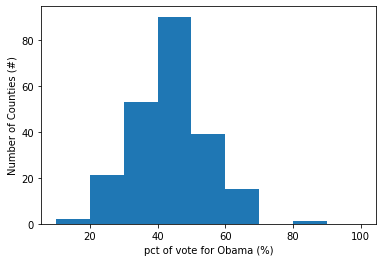

In [17]:
bin_edges = np.arange(10, 110, 10)

plt.hist(data=df_swing, x='dem_share', bins=bin_edges)

plt.xlabel('pct of vote for Obama (%)')
plt.ylabel('Number of Counties (#)');

### Bee Swarm Plot

___Disadvantage___ for the swarm plot:

<img src='beeswarm_disadv.png' align='left' width=700>

In [18]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


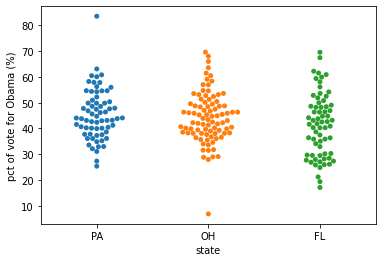

In [20]:
sns.swarmplot(data=df_swing, x='state', y='dem_share')

plt.xlabel('state')
plt.ylabel('pct of vote for Obama (%)');

/Users/alejandrosanz/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


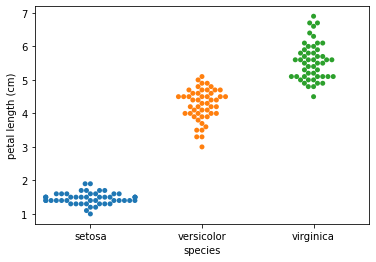

In [69]:
_ = sns.swarmplot(x='species', y='petal length (cm)', data=iris_df)

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

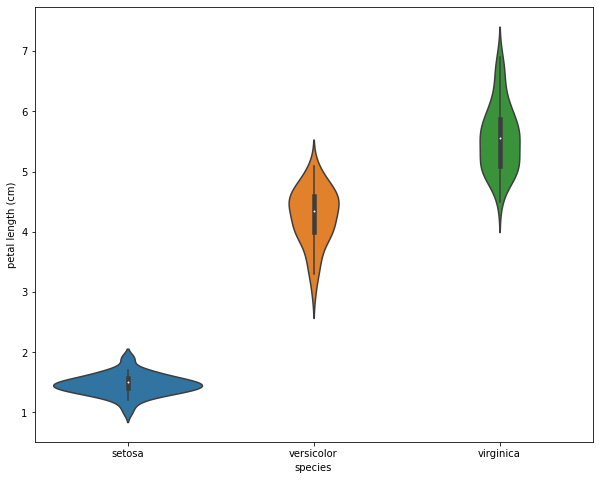

In [75]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=iris_df, x='species', y='petal length (cm)')

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

### ECDFs

**ECDF: Empirical Cumulative Distribution Function 经验累积分布函数**

**STEPS:**

1. Sort the data
2. Number the data

In [ ]:
def ecdf(df, col_name):
    """Plot ecdf based on a given dataframe and column name"""
    x = np.sort(df[col_name])
    length = len(df[col_name])
    y = np.arange(1, length+1) / length
    
    # Plot and set properties
    plt.plot(x, y, marker='.', linestyle='')
    plt.xlabel("{}".format(col_name))
    plt.ylabel('ECDF')
    
    # Keep data off plot edges
    plt.margins(.1);

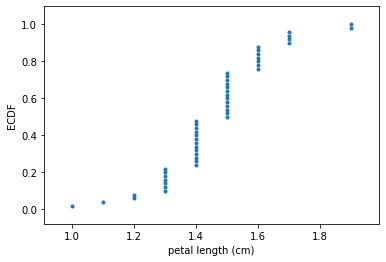

In [88]:
# Test
ecdf(iris_df[iris_df.species=='setosa'], 'petal length (cm)')